# Algorithms for Structured Matrices

---

For matrices with some special structure, it is possible to derive versions of algorithms which are faster and/or more accurate than the standard algorithms.

## Prerequisites

The reader should be familiar with concepts of eigenvalues and eigen vectors, singular values and singular vectors, related perturbation theory, and algorithms.
 
## Competences 

The reader should be able to recognise matrices which have rank-revealing decomposition and apply adequate algorithms, and to apply forward stable algorithms to arrowhead and diagonal-plus-rank-one matrices.

---

## Rank revealing decompositions

For more details, see 
[Z. Drmač, Computing Eigenvalues and Singular Values to High Relative Accuracy][Hog14a]
and [J. Demmel et al, Computing the singular value decomposition with high relative accuracy][DGESVD99]
and the references therein.

[Hog14a]: #1 "L. Hogben, ed., 'Handbook of Linear Algebra', pp. 59.8-59.11, CRC Press, Boca Raton, 2014."

[DGESVD99]: http://www.sciencedirect.com/science/article/pii/S0024379599001342 "J. Demmel, M. Gu, S. Eisenstat, I. Slapničar, K. Veselić and Z. Drmač, 'Computing the singular value decomposition with high relative accuracy', Lin. Alg. Appl., 299 (1999) 21-80."

Let $A\in\mathbb{R}^{m\times n}$ with $\mathop{\mathrm{rank}}(A)=n$ (therefore, $m\geq n$) and
$A=U\Sigma V^T$ its thin SVD.

### Definitions

Let $A\in\mathbb{R}^{m\times n}$. 

The singular values of $A$ are (__perfectly__) __well determined to high relative accuracy__ 
if changing any entry $A_{kl}$ to $\theta A_{kl}$, $\theta \neq 0$, causes perturbations in singular values bounded by 
$\min\{|\theta|,1/|\theta|\}\sigma_j \leq\tilde \sigma_j \leq  
\max\{|\theta|,1/|\theta|\}\sigma_j$ for all $j$.

The __sparsity pattern__ of $A$, $Struct(A)$, is the set of indices for which 
$A_{kl}$ is permitted to be non-zero.

The __bipartite graph__ of the sparsity pattern $S$, $\mathcal{G}(S)$, is the graph with vertices partitioned into row vertices $r_1,\ldots,r_m$ and column vertices $c_1,\ldots,c_n$, where $r_k$ and $c_l$ are connected if and only if $(k,l)\in S$. 

If $\mathcal{G}(S)$ is acyclic, matrices with sparsity pattern $S$ are __biacyclic__.

A decomposition $A=XDY^T$ with diagonal matrix $D$ is called a __rank revealing decomposition__ (RRD) if $X$ and $Y$ are full-column rank well-conditioned matrices. 

__Hilbert matrix__ is a square matrix $H$ with elements $H_{ij}=\displaystyle\frac{1}{i+j-1}$. 

__Hankel matrix__ is a square matrix with constant elements along skew-diagonals.

__Cauchy matrix__ is an $m\times n$ matrix $C$ with elements $C_{ij}=\displaystyle\frac{1}{x_i+y_j}$ with $x_i+y_j\neq 0$ for all $i,j$.

### Facts

1. The singular values of $A$ are perfectly well determined to high relative accuracy if and only if the bipartite graph $\mathcal{G}(S)$ is acyclic (forest of trees). Examples are bidiagonal and arrowhead matrices. Sparsity pattern $S$ of acyclic bipartite graph allows at most $m+n-1$ nonzero entries. A bisection algorithm computes all singular values of biacyclic matrices to high relative accuracy.

2. An RRD of $A$ can be given or computed to high accuracy by some method. Typical methods are Gaussian elimination with complete pivoting or QR factorization with complete pivoting. 

2. Let $\hat X \hat D \hat Y^T$ be the computed RRD of $A$ satisfying 
$|D_{jj}-\hat D_{jj}|\leq O(\varepsilon)|D_{jj}|$, $\| X-\hat X\|\leq O(\varepsilon) \|X\|$,
and $\| Y-\hat Y\|\leq O(\varepsilon) \|Y\|$. The following algorithm computes the EVD of $A$ with high relative accuracy:
    1. Perform QR factorization with pivoting to get $\hat X\hat D=QRP$, where $P$ is a permutation matrix. Thus $A=QRP\hat Y^T$. 
    2. Multiply $W=RP\hat Y^T$ (_NOT_ Strassen's multiplication). Thus $A=QW$ and $W$ is well-scaled from the left.
    3. Compute the SVD of $W^T=V\Sigma^T \bar U^T$ using one-sided Jacobi method. Thus $A=Q\bar U \Sigma V^T$. 
    4. Multiply $U=Q\bar U$. Thus $A=U\Sigma V^T$ is the computed SVD of $A$.

3. Let $R=D'R'$, where $D'$ is such that the _rows_ of $R'$ have unit norms.  Then the following error bounds hold:
$$
\frac{|\sigma_j-\tilde\sigma_j|}{\sigma_j}\leq O(\varepsilon \kappa(R')\cdot \max\{\kappa(X),\kappa(Y)\})\leq
O(\varepsilon n^{3/2}\kappa(X)\cdot \max\{\kappa(X),\kappa(Y)\}).
$$

4. Hilbert matrix is Hankel matrix and Cauchy matrix, it is symmetric positive definite and 
_very_ ill-conditioned.

5. Every sumbatrix of a Cauchy matrix is itself a Cauchy matrix. 

6. Determinat of a square Cauchy matrix is
$$
\det(C)=\frac{\prod_{1\leq i<j\leq n}(x_j-x_i)(y_j-y_i)}
{\prod_{1\leq i,j\leq n} (x_i+y_j)}.
$$
It is computed with elementwise high relative accuracy.

7. Let $A$ be square and nonsingular and let $A=LDR$ be its decomposition with 
diagonal $D$, lower unit-triangular $L$, and upper unit-triangular $R$. The closed formulas using quotients of minors are (see [A. S. Householder, The Theory of Matrices in Numerical Analysis][Hou75]):

\begin{align*}
D_{11}&=A_{11}, \\
D_{jj}&=\frac{\det(A_{1:j,1:j})}{\det(A_{1:j-1,1:j-1})}, \quad j=2,\ldots,n, \\
L_{jj}&=1, \\
L_{ij}&=\frac{\det(A_{[1,2,\ldots,j-1,i],[1:j]}\, )}
{\det(A_{1:j,1:j})}, \quad j < i, \\
R_{jj}&=1, \\
R_{ji}&=\frac{\det(A_{[1,2,\ldots,j],[1,2, \ldots,j-1,i]}\, )}
{\det(A_{1:j,1:j})}, \quad i > j, 
\end{align*}

[Hou75]:  https://books.google.hr/books?id=hCre109IpRcC&printsec=frontcover&hl=hr&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false "Alston S. Householder, 'The Theory of Matrices in Numerical Analysis', pp. 10-12, Dover, New York, 1995, 2006."

### Example - Positive definite matrix

Let $A=DA_S D$ be strongly scaled symmetric positive definite matrix. Then Cholesky factorization with 
complete (diagonal) pivoting is an RRD. Consider the following three step algorithm:

1. Compute $P^T A P=LL^T$ (_Cholesky factorization with complete pivoting_). 
2. Compute the $L=\bar U\Sigma V^T$ (_one-sided Jacobi, V is not needed_).
3. Set $\Lambda=\Sigma^2$ and $U=P\bar U$. Thus $A=U\Lambda U^T$ is an EVD of $A$.

The Cholesky factorization with pivoting can be implemented very fast with block algorithm
(see [C. Lucas, LAPack-Style Codes for Level 2 and 3 Pivoted Cholesky Factorizations](http://www.netlib.org/lapack/lawnspdf/lawn161.pdf)).

The eigenvalues $\tilde \lambda_j$ computed using the above algorithm satisfy relative error bounds:
$$
\frac{|\lambda_j-\tilde\lambda_j|}{\lambda_j} \leq O(n\varepsilon \|A_S\|_2^{-1}).
$$


In [1]:
include("ModuleB.jl")
using ModuleB

In [2]:
n=20
B=randn(n,n)
# Scaled matrix
As=full(Symmetric(B'*B))
# Scaling
D=exp(50*(rand(n)-0.5))
# Parentheses are necessary!
A=map(Float64,[As[i,j]*(D[i]*D[j]) for i=1:n, j=1:n])
issymmetric(A), cond(As), cond(A)

(true,1978.5900801115251,1.322042691206818e38)

In [3]:
?chol

search: chol cholfact cholfact! searchsortedlast CachingPool chop chown chomp



```
chol(A) -> U
```

Compute the Cholesky factorization of a positive definite matrix `A` and return the UpperTriangular matrix `U` such that `A = U'U`.

```
chol(x::Number) -> y
```

Compute the square root of a non-negative number `x`.


We will not use the Cholesky factorization with complete pivoting. Instead, we will just sort the diagonal of $A$ in advance, which is sufficient for this example. 

_Write the function for Cholesky factorization with complete pivoting as an excercise._

In [4]:
?sortperm

search: sortperm sortperm!



```
sortperm(v, [alg=<algorithm>,] [by=<transform>,] [lt=<comparison>,] [rev=false])
```

Return a permutation vector of indices of `v` that puts it in sorted order. Specify `alg` to choose a particular sorting algorithm (see Sorting Algorithms). `MergeSort` is used by default, and since it is stable, the resulting permutation will be the lexicographically first one that puts the input array into sorted order – i.e. indices of equal elements appear in ascending order. If you choose a non-stable sorting algorithm such as `QuickSort`, a different permutation that puts the array into order may be returned. The order is specified using the same keywords as `sort!`.

See also [`sortperm!`](:func:`sortperm!`).


In [5]:
p=sortperm(diag(A), rev=true)
L=chol(A[p,p])

20×20 UpperTriangular{Float64,Array{Float64,2}}:
 1.94782e10  1.63484e9    1.49662e7  …   3.73281e-10  -3.96763e-10
  ⋅          1.11002e10  -1.19061e7      4.2019e-10   -1.26418e-9 
  ⋅           ⋅           8.71633e7     -5.18309e-9   -5.1726e-10 
  ⋅           ⋅            ⋅            -2.20152e-9   -3.76856e-10
  ⋅           ⋅            ⋅             1.71354e-9    1.21459e-9 
  ⋅           ⋅            ⋅         …  -5.92096e-9    1.75793e-10
  ⋅           ⋅            ⋅            -1.13009e-9   -5.76503e-10
  ⋅           ⋅            ⋅             2.07234e-9   -4.42673e-10
  ⋅           ⋅            ⋅            -7.05083e-10  -6.7352e-10 
  ⋅           ⋅            ⋅             2.08437e-9   -1.17079e-9 
  ⋅           ⋅            ⋅         …  -2.51558e-9    5.69387e-11
  ⋅           ⋅            ⋅             1.0274e-9     4.29172e-10
  ⋅           ⋅            ⋅             1.8253e-9    -7.21559e-10
  ⋅           ⋅            ⋅            -1.0775e-9    -6.45469e-10
  ⋅          

In [6]:
U,σ,V=myJacobiR(full(L'));

In [7]:
λ=σ.^2
U1=U[invperm(p),:]
λ

20-element Array{Float64,1}:
    3.83338e20 
    1.2195e20  
    7.99665e15 
    1.86134e15 
    1.01896e15 
    3.48351e14 
    7.66634e10 
    4.4185e10  
    4.35119e5  
 2220.19       
  922.827      
    0.242684   
    0.000634069
    1.32968e-5 
    5.59416e-7 
    2.19849e-8 
    9.95853e-12
    3.63853e-12
    1.85048e-18
    2.53315e-19

In [8]:
U1'*A*U1

20×20 Array{Float64,2}:
      3.83338e20  -16369.7         …   6.23904        3.12647    
 -12283.4              1.2195e20      11.6002       -11.214      
    418.169          802.658          -0.443359      -0.220358   
    -86.8297           8.82471        -0.0732945     -0.0684505  
    -33.4839          -1.97929         0.00786571     0.0330412  
    -14.5609          17.8648      …  -0.103749      -0.0356164  
      0.174997        -0.0619782       5.59406e-13    9.7017e-13 
      0.223755         0.254931       -4.61251e-12   -1.97371e-12
     -0.00583677      -0.00291087      2.07523e-20    4.07525e-10
 -50597.9         -47355.7            -3.40595e-15    4.43067e-15
 -23741.8           5547.08        …   9.08203e-17   -7.15168e-16
    333.066          228.812           2.69925e-17   -1.83737e-17
     36.1713           9.50102         5.2889e-17     9.44923e-18
     -4.07638         -4.78924        -4.02527e-17   -3.32383e-17
     -0.606052        -1.65423         6.43149e-18  

In [9]:
[λ sort(eigvals(A),rev=true)]

20×2 Array{Float64,2}:
    3.83338e20        3.83338e20 
    1.2195e20         1.2195e20  
    7.99665e15        7.99665e15 
    1.86134e15        1.86134e15 
    1.01896e15        1.01896e15 
    3.48351e14        3.48351e14 
    7.66634e10        7.66634e10 
    4.4185e10         4.4185e10  
    4.35119e5         4.35119e5  
 2220.19           2220.19       
  922.827           922.827      
    0.242684          0.242684   
    0.000634069       0.00063404 
    1.32968e-5        1.52608e-5 
    5.59416e-7        2.88211e-8 
    2.19849e-8        4.13794e-12
    9.95853e-12       2.03108e-12
    3.63853e-12      -0.00154503 
    1.85048e-18      -0.0927589  
    2.53315e-19  -40017.8        

### Example - Hilbert matrix

We need the newest version of the package 
[SpecialMatrices.jl](https://github.com/jiahao/SpecialMatrices.jl).

In [10]:
# Pkg.checkout("SpecialMatrices")
using SpecialMatrices

In [11]:
whos(SpecialMatrices)

                        Cauchy    180 bytes  DataType
                     Circulant    168 bytes  DataType
                     Companion    168 bytes  DataType
                     Frobenius    180 bytes  DataType
                        Hankel    168 bytes  DataType
                       Hilbert    180 bytes  DataType
                         Kahan    244 bytes  DataType
                       Riemann    168 bytes  DataType


In [12]:
C=Cauchy([1,2,3,4,5],[0,1,2,3,4])

5×5 SpecialMatrices.Cauchy{Int64}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [13]:
H=Hilbert(5)

SpecialMatrices.Hilbert{Rational{Int64}}(5,5)

In [14]:
Hf=full(H)

5×5 Array{Rational{Int64},2}:
 1//1  1//2  1//3  1//4  1//5
 1//2  1//3  1//4  1//5  1//6
 1//3  1//4  1//5  1//6  1//7
 1//4  1//5  1//6  1//7  1//8
 1//5  1//6  1//7  1//8  1//9

In [15]:
# This is exact
det(Hf)

1//266716800000

In [16]:
# Exact formula for the determinant of a Cauchy matrix from Fact 7.
import Base.det
function det{T}(C::Cauchy{T})
    n=length(C.x)
    F=triu([(C.x[j]-C.x[i])*(C.y[j]-C.y[i]) for i=1:n, j=1:n],1)
    num=prod(F[find(F)])
    den=prod([(C.x[i]+C.y[j]) for i=1:n, j=1:n])
    if isinteger(C.x)&isinteger(C.y)
        return num//den
    else
        return num/den
    end
end

det (generic function with 23 methods)

In [17]:
det(C)

1//266716800000

We now compute componentwise highly accurate $A=LDL ^T$ factorization of a Hilbert (Cauchy) matrix. Using `Rational` numbers gives high accuracy.

In [18]:
# Exact LDLT factorization from Fact 8, no pivoting.
function myLDLT{T}(C::Cauchy{T})
    n=length(C.x)
    D=Array(Rational{T},n)
    L=eye(Rational{T},n)
    δ=[det(Cauchy(C.x[1:j],C.y[1:j])) for j=1:n]
    D[1]=map(Rational{T},C[1,1])
    D[2:n]=δ[2:n]./δ[1:n-1]
    for i=2:n
        for j=1:i-1
            L[i,j]=det(Cauchy( C.x[[1:j-1;i]], C.y[1:j])) / δ[j]
        end
    end
    L,D
end

myLDLT (generic function with 1 method)

In [19]:
L,D=myLDLT(C)
L

5×5 Array{Rational{Int64},2}:
 1//1  0//1    0//1  0//1  0//1
 1//2  1//1    0//1  0//1  0//1
 1//3  1//1    1//1  0//1  0//1
 1//4  9//10   3//2  1//1  0//1
 1//5  4//5   12//7  2//1  1//1

In [20]:
D

5-element Array{Rational{Int64},1}:
 1//1    
 1//12   
 1//180  
 1//2800 
 1//44100

In [21]:
L*diagm(D)*L' # -full(H)

5×5 Array{Rational{Int64},2}:
 1//1  1//2  1//3  1//4  1//5
 1//2  1//3  1//4  1//5  1//6
 1//3  1//4  1//5  1//6  1//7
 1//4  1//5  1//6  1//7  1//8
 1//5  1//6  1//7  1//8  1//9

In [22]:
# L*D*L' is an RRD
cond(L)

11.858249f0

We now compute the accurate EVD of the Hilbert matrix of order $n=100$. We cannot use the function `myLDLT()` since the _computation of determinant causes overflow_ and _there is no pivoting_. Instead, we use Algorithm 3 from
[J. Demmel, Computing the singular value decomposition with high relative accuracy][Dem99].

[Dem99]: http://www.netlib.org/lapack/lawnspdf/lawn130.pdf "J. Demmel, 'Computing the singular value decomposition with high relative accuracy', Lapack Working Note 130, SIAM J. Matrix Anal. Appl, 21 (1999) 562-580."

In [23]:
function myGECP(C::Cauchy)
    n=length(C.x)
    G=full(C)
    x=copy(C.x)
    y=copy(C.y)
    pr=collect(1:n)
    pc=collect(1:n)
    # Find the maximal element
    for k=1:n-1
        i,j=ind2sub(size(G[k:n,k:n]),indmax(abs(G[k:n,k:n])))
        i+=k-1
        j+=k-1
        if i!=k || j!=k
            G[[i,k],:]=G[[k,i],:]
            G[:, [j,k]]=G[:, [k,j]]
            x[[k,i]]=x[[i,k]]
            y[[k,j]]=y[[j,k]]
            pr[[i,k]]=pr[[k,i]]
            pc[[j,k]]=pc[[k,j]]
        end
        for r=k+1:n
            for s=k+1:n
                G[r,s]=G[r,s]*(x[r]-x[k])*(y[s]-y[k])/
                ((x[k]+y[s])*(x[r]+y[k]))
            end
        end
        G=full(Symmetric(G))
    end
    D=diag(G)
    X=tril(G,-1)*diagm(1.0./D)+I
    Y=diagm(1.0./D)*triu(G,1)+I
    X,D,Y', pr,pc
end

myGECP (generic function with 1 method)

In [24]:
# First a smaller test
l=8
C=Cauchy(collect(1:l),collect(0:l-1))

8×8 SpecialMatrices.Cauchy{Int64}:
 1.0       0.5       0.333333  0.25       …  0.166667   0.142857   0.125    
 0.5       0.333333  0.25      0.2           0.142857   0.125      0.111111 
 0.333333  0.25      0.2       0.166667      0.125      0.111111   0.1      
 0.25      0.2       0.166667  0.142857      0.111111   0.1        0.0909091
 0.2       0.166667  0.142857  0.125         0.1        0.0909091  0.0833333
 0.166667  0.142857  0.125     0.111111   …  0.0909091  0.0833333  0.0769231
 0.142857  0.125     0.111111  0.1           0.0833333  0.0769231  0.0714286
 0.125     0.111111  0.1       0.0909091     0.0769231  0.0714286  0.0666667

In [25]:
X,D,Y,pr,pc=myGECP(C)

(
[1.0 0.0 … 0.0 0.0; 0.333333 1.0 … 0.0 0.0; … ; 0.142857 0.714286 … 1.0 0.0; 0.166667 0.78125 … 0.712963 1.0],

[1.0,0.0888889,0.0127604,0.00231481,9.07029e-5,7.37898e-7,6.61941e-8,2.35297e-10],
[1.0 0.0 … 0.0 0.0; 0.333333 1.0 … 0.0 0.0; … ; 0.142857 0.714286 … 1.0 0.0; 0.166667 0.78125 … 0.712963 1.0],

[1,3,8,2,5,4,7,6],[1,3,8,2,5,4,7,6])

In [26]:
norm((X*diagm(D)*Y')-full(C)[pr,pc])

8.488925965415388e-17

In [27]:
norm(X[invperm(pr),:]*diagm(D)*Y[invperm(pc),:]'-full(C))

8.488925965415385e-17

In [28]:
# Now the big test.
n=100
H=Hilbert(n)
C=Cauchy(collect(1:n), collect(0:n-1))

100×100 SpecialMatrices.Cauchy{Int64}:
 1.0        0.5         0.333333    …  0.0102041   0.010101    0.01      
 0.5        0.333333    0.25           0.010101    0.01        0.00990099
 0.333333   0.25        0.2            0.01        0.00990099  0.00980392
 0.25       0.2         0.166667       0.00990099  0.00980392  0.00970874
 0.2        0.166667    0.142857       0.00980392  0.00970874  0.00961538
 0.166667   0.142857    0.125       …  0.00970874  0.00961538  0.00952381
 0.142857   0.125       0.111111       0.00961538  0.00952381  0.00943396
 0.125      0.111111    0.1            0.00952381  0.00943396  0.00934579
 0.111111   0.1         0.0909091      0.00943396  0.00934579  0.00925926
 0.1        0.0909091   0.0833333      0.00934579  0.00925926  0.00917431
 0.0909091  0.0833333   0.0769231   …  0.00925926  0.00917431  0.00909091
 0.0833333  0.0769231   0.0714286      0.00917431  0.00909091  0.00900901
 0.0769231  0.0714286   0.0666667      0.00909091  0.00900901  0.00892857

We need a function to compute RRD from `myGECP()`

In [29]:
function myRRD(C::Cauchy)
    X,D,Y,pr,pc=myGECP(C)
    X[invperm(pr),:], D, Y[invperm(pc),:]
end

myRRD (generic function with 1 method)

In [30]:
X,D,Y=myRRD(C);

In [31]:
# Check
norm((X*diagm(D)*Y')-full(C))

1.2340699192861446e-16

In [32]:
# Is this RRD? here X=Y
cond(X), cond(Y)

(72.24644120521842,72.24644120521842)

In [33]:
# Algorithm from Fact 3
function myRRDSVD(X,D,Y)
    Q,R,p=qr(X*diagm(D),Val{true},thin=true)
    W=R[:,p]*Y'
    V,σ,U1=myJacobiR(W')
    U=Q*U1
    U,σ,V
end

myRRDSVD (generic function with 1 method)

In [34]:
U,σ,V=myRRDSVD(X,D,Y);

In [35]:
# Check residual and orthogonality
norm(full(C)*V-U*diagm(σ)), norm(U'*U-I), norm(V'*V-I)

(1.233471092882553e-15,2.604664737893255e-15,9.330915014096382e-15)

In [36]:
# Observe the difference!!
[sort(σ) sort(svdvals(C)) sort(eigvals(full(C)))]

100×3 Array{Float64,2}:
 5.7797e-151   1.16516e-19  -5.8014e-16 
 1.29735e-147  1.59193e-19  -4.96923e-16
 1.44439e-144  3.7406e-19   -3.4727e-16 
 1.06342e-141  4.40985e-19  -2.52902e-16
 5.82434e-139  6.052e-19    -1.82281e-16
 2.5311e-136   6.33403e-19  -1.43636e-16
 9.09071e-134  7.85808e-19  -1.29068e-16
 2.77536e-131  8.84661e-19  -1.04099e-16
 7.35195e-129  1.06447e-18  -7.86621e-17
 1.71656e-126  1.25096e-18  -7.16606e-17
 3.57648e-124  1.29959e-18  -6.29428e-17
 6.71629e-122  1.41074e-18  -5.68772e-17
 1.14619e-119  1.45684e-18  -4.60919e-17
 ⋮                                      
 2.41265e-8    2.41265e-8    2.41265e-8 
 1.78872e-7    1.78872e-7    1.78872e-7 
 1.26617e-6    1.26617e-6    1.26617e-6 
 8.53628e-6    8.53628e-6    8.53628e-6 
 5.46453e-5    5.46453e-5    5.46453e-5 
 0.000330868   0.000330868   0.000330868
 0.00188506    0.00188506    0.00188506 
 0.0100318     0.0100318     0.0100318  
 0.0492923     0.0492923     0.0492923  
 0.218596      0.218596      0.21

In [37]:
# Plot the eigenvalues (singular values) and left singular vectors
using Gadfly

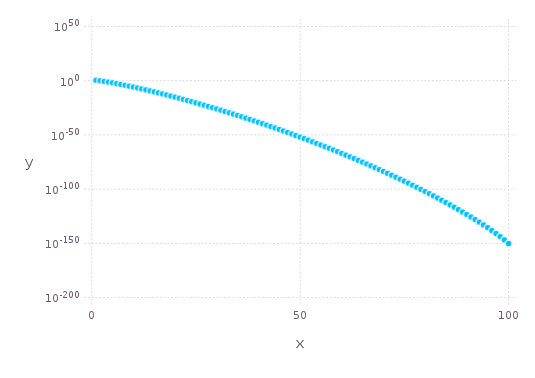

In [38]:
plot(x=collect(1:length(σ)),y=σ,Scale.y_log10)


(process:8668): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed


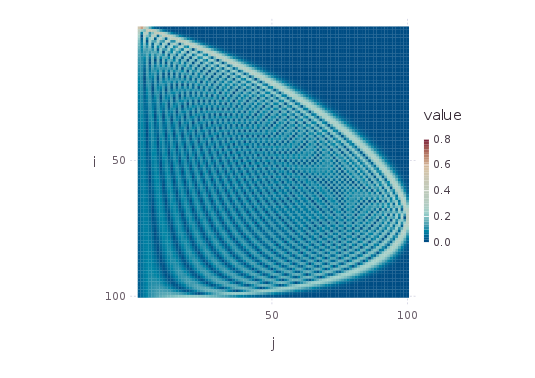

In [39]:
spy(abs(U))

## Symmetric arrowhead and DPR1 matrices

For more details, see 
[N. Jakovčević Stor, I. Slapničar and J. Barlow, Accurate eigenvalue decomposition of real symmetric arrowhead matrices and applications][JSB15]
and [N. Jakovčević Stor, I. Slapničar and J. Barlow, Forward stable eigenvalue decomposition of rank-one modifications of diagonal matrices][JSB15a].

[JSB15]: http://arxiv.org/abs/1302.7203 "N. Jakovčević Stor, I. Slapničar and J. Barlow, 'Accurate eigenvalue decomposition of real symmetric arrowhead matrices and applications', Lin. Algebra and its Appl, 464 (2015) 62-89." 

[JSB15a]: http://arxiv.org/abs/1405.7537 "N. Jakovčević Stor, I. Slapničar and J. Barlow, 'Forward stable eigenvalue decomposition of rank-one modifications of diagonal matrices', Lin. Algebra and its Appl, 487 (2015) 301-315." 

### Definitions

An __arrowhead matrix__ is a real symmetric matrix of order $n$ of the form
$A=\begin{bmatrix} D & z \\ z^{T} & \alpha \end{bmatrix}$,
where $D=\mathop{\mathrm{diag}}(d_{1},d_{2},\ldots ,d_{n-1})$, 
$z=\begin{bmatrix} \zeta _{1} & \zeta _{2} & \cdots & \zeta _{n-1} \end{bmatrix}^T$ is a vector, and 
$\alpha$ is a scalar.

An arrowhead matrix is __irreducible__ if 
$\zeta _{i}\neq 0$ for all $i$ and $d_{i}\neq d_{j}$ for all $i\neq j$.

A __diagonal-plus-rank-one matrix __ (DPR1 matrix) is a real symmetric matrix of order $n$ of the form
$A= D +\rho z z^T$,
where $D=\mathop{\mathrm{diag}}(d_{1},d_{2},\ldots ,d_{n})$, 
$z=\begin{bmatrix} \zeta _{1} & \zeta _{2} & \cdots & \zeta _{n} \end{bmatrix}^T$
is a vector, and $\rho \neq 0$ is a scalar.

A DPR1 matrix is __irreducible__ if $\zeta _{i}\neq 0$ for all $i$ and $d_{i}\neq d_{j}$ for all $i\neq j$.

### Facts on arrowhead matrices

Let $A$ be an arrowhead matrix of order $n$ and let $A=U\Lambda U^T$ be its EVD.

1. If $d_i$ and $\lambda_i$ are nonincreasingy ordered, the Cauchy Interlace Theorem implies 
$$\lambda _{1}\geq d_{1}\geq \lambda _{2}\geq d_{2}\geq \cdots \geq d_{n-2}\geq\lambda
_{n-1}\geq d_{n-1}\geq \lambda _{n}.
$$

2. If $\zeta _{i}=0$ for some $i$, then $d_{i}$ is an eigenvalue whose corresponding eigenvector is 
the $i$-th unit vector, and we can reduce the size of the problem by deleting the 
$i$-th row and column of the matrix. If $d_{i}=d_{j}$, then $d_{i}$ is
an eigenvalue of $A$ (this follows from the interlacing property) 
and we can reduce the size of the problem by annihilating $\zeta_j$ with a Givens rotation in the $(i,j)$-plane.

3. If $A$ is irreducible, the interlacing property holds with strict inequalities. 

4. The eigenvalues of $A$ are the zeros of the __Pick function__
$$
f(\lambda )=\alpha -\lambda -\sum_{i=1}^{n-1}\frac{\zeta _{i}^{2}}{%
d_{i}-\lambda }=\alpha -\lambda -z^{T}(D-\lambda I)^{-1}z,
$$
and the corresponding eigenvectors are 
$$
U_{:,i}=\frac{x_{i}}{\left\Vert x_{i}\right\Vert _{2}},\quad 
x_{i}=\begin{bmatrix}
\left( D-\lambda _{i}I\right) ^{-1}z \\ 
-1%
\end{bmatrix}, 
\quad i=1,\ldots ,n.
$$

5. Let $A$ be irreducible and nonsingular. If $d_i\neq 0$ for all $i$, then $A^{-1}$ is a DPR1 matrix
$$
A^{-1}=\begin{bmatrix} D^{-1} &  \\ & 0 \end{bmatrix} + \rho uu^{T},
$$
where $u=\begin{bmatrix} z^{T}D^{-1} \\ -1 \end{bmatrix}$, and $\rho =\displaystyle\frac{1}{\alpha-z^{T}D^{-1}z}$.
If $d_i=0$, then $A^{-1}$ is a permuted arrowhead matrix,
$$
A^{-1}\equiv 
\begin{bmatrix}
D_{1} & 0 & 0 & z_{1} \\ 
0 & 0 & 0 & \zeta _{i} \\ 
0 & 0 & D_{2} & z_{2} \\ 
z_{1}^{T} & \zeta _{i} & z_{2}^{T} & \alpha
\end{bmatrix}^{-1}
= \begin{bmatrix}
D_{1}^{-1} & w_{1} & 0 & 0 \\ 
w_{1}^{T} & b & w_{2}^{T} & 1/\zeta _{i} \\ 
0 & w_{2} & D_{2}^{-1} & 0 \\ 
0 & 1/\zeta _{i} & 0 & 0
\end{bmatrix},
$$
where
$w_{1}=-D_{1}^{-1}z_{1}\displaystyle\frac{1}{\zeta _{i}}$, 
$w_{2}=-D_{2}^{-1}z_{2}\displaystyle\frac{1}{\zeta _{i}}$, and
$b= \displaystyle\frac{1}{\zeta _{i}^{2}}\left(-\alpha +z_{1}^{T}D_{1}^{-1}z_{1}+z_{2}^{T}D_{2}^{-1}z_{2}\right)$.

6. The algorithm based on the following approach computes all eigenvalues and _all components_ of the corresponding eigenvectors in a forward stable manner to almost full accuracy in $O(n)$ operations per eigenpair:
    1. Shift the irreducible $A$ to $d_i$ which is closer to $\lambda_i$ (one step of bisection on $f(\lambda)$).
    2. Invert the shifted matrix.
    3. Compute the absolutely largest eigenvalue of the inverted shifted matrix and the corresponding eigenvector.

7. The algorithm is implemented in the package [Arrowhead.jl](https://github.com/ivanslapnicar/Arrowhead.jl). In certain cases, $b$ or $\rho$ need to be computed with extended precision for which the package 
[DoubleDouble.jl](https://github.com/simonbyrne/DoubleDouble.jl) is used.

### Example - Random arrowhead matrix

In [40]:
# Pkg.add("Arrowhead"); Pkg.checkout("Arrowhead")
using Arrowhead


(process:8668): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed


In [41]:
whos(Arrowhead)

                     Arrowhead     30 KB     Module
                  GenHalfArrow      0 bytes  Arrowhead.#GenHalfArrow
                   GenSymArrow      0 bytes  Arrowhead.#GenSymArrow
                    GenSymDPR1      0 bytes  Arrowhead.#GenSymDPR1
                     HalfArrow    180 bytes  DataType
                      SymArrow    204 bytes  DataType
                       SymDPR1    192 bytes  DataType
                        bisect      0 bytes  Arrowhead.#bisect
                           eig      0 bytes  Base.LinAlg.#eig
                           inv      0 bytes  Base.#inv
                      rootsWDK      0 bytes  Arrowhead.#rootsWDK
                       rootsah      0 bytes  Arrowhead.#rootsah
                           svd      0 bytes  Base.LinAlg.#svd
                           tdc      0 bytes  Arrowhead.#tdc


In [42]:
methods(GenSymArrow)

# 1 method for generic function "GenSymArrow":
GenSymArrow(n::Integer, i::Integer) at /home/slap/.julia/v0.5/Arrowhead/src/arrowhead3.jl:8

In [43]:
n=10
A=GenSymArrow(n,n)

10×10 Arrowhead.SymArrow{Float64}:
 0.99739   0.0       0.0       0.0       …  0.0       0.0       0.757647
 0.0       0.159017  0.0       0.0          0.0       0.0       0.151539
 0.0       0.0       0.086771  0.0          0.0       0.0       0.61786 
 0.0       0.0       0.0       0.35489      0.0       0.0       0.634149
 0.0       0.0       0.0       0.0          0.0       0.0       0.530825
 0.0       0.0       0.0       0.0       …  0.0       0.0       0.194168
 0.0       0.0       0.0       0.0          0.0       0.0       0.762416
 0.0       0.0       0.0       0.0          0.504125  0.0       0.500881
 0.0       0.0       0.0       0.0          0.0       0.959209  0.278833
 0.757647  0.151539  0.61786   0.634149     0.500881  0.278833  0.655481

In [44]:
# Elements of the type SymArrow
A.D, A.z, A.a, A.i

([0.99739,0.159017,0.086771,0.35489,0.580913,0.239321,0.453316,0.504125,0.959209],[0.757647,0.151539,0.61786,0.634149,0.530825,0.194168,0.762416,0.500881,0.278833],0.6554808722141492,10)

In [45]:
tols=[1e2,1e2,1e2,1e2,1e2]
U,λ=eig(A,tols)
norm(full(A)*U-U*diagm(λ)), norm(U'*U-I)

(5.883720768496326e-16,5.985358801497119e-16)

In [46]:
# Timings - notice the O(n^2)
@time eig(GenSymArrow(1000,1000),tols);
@time eig(GenSymArrow(2000,2000),tols);

  0.524111 seconds (1.10 M allocations: 121.561 MB, 5.82% gc time)
  1.395827 seconds (4.16 M allocations: 476.305 MB, 13.50% gc time)


### Example - Numerically demanding matrix

In [47]:
A=SymArrow( [ 1e10+1.0/3.0, 4.0, 3.0, 2.0, 1.0 ], [ 1e10 - 1.0/3.0, 1.0, 1.0, 1.0, 1.0 ], 1e10, 6 )

6×6 Arrowhead.SymArrow{Float64}:
 1.0e10  0.0  0.0  0.0  0.0  1.0e10
 0.0     4.0  0.0  0.0  0.0  1.0   
 0.0     0.0  3.0  0.0  0.0  1.0   
 0.0     0.0  0.0  2.0  0.0  1.0   
 0.0     0.0  0.0  0.0  1.0  1.0   
 1.0e10  1.0  1.0  1.0  1.0  1.0e10

In [48]:
U,λ=eig(A,tols);
println([sort(λ) sort(eigvals(full(A)))])

[-0.348142 -0.348142; 1.26185 1.26185; 2.22325 2.22325; 3.18832 3.18832; 4.17472 4.17472; 2.0e10 2.0e10]


### Facts on DPR1 matrices

The properties of DPR1 matrices are very similar to those of arrowhead matrices. 
Let $A$ be a DPR1 matrix of order $n$ and let $A=U\Lambda U^T$ be its EVD.

1. If $d_i$ and $\lambda_i$ are nonincreasingy ordered and $\rho>0$, then 
$$\lambda _{1}\geq d_{1}\geq \lambda _{2}\geq d_{2}\geq \cdots \geq d_{n-2}\geq\lambda
_{n-1}\geq d_{n-1}\geq \lambda _{n}\geq d_n.
$$
If $A$ is irreducible, the inequalities are strict.

2. Facts  2 on arrowhead matrices holds.

3. The eigenvalues of $A$ are the zeros of the __secular equation__ 
$$
f(\lambda )=1+\rho\sum_{i=1}^{n}\frac{\zeta _{i}^{2}}{d_{i}-\lambda }
=1 +\rho z^{T}(D-\lambda I)^{-1}z=0,
$$
and the corresponding eigenvectors are 
$$
U_{:,i}=\frac{x_{i}}{\left\Vert x_{i}\right\Vert _{2}},\quad
x_{i}=( D-\lambda _{i}I) ^{-1}z.
$$

5. Let $A$ be irreducible and nonsingular. If $d_i\neq 0$ for all $i$, then
$$
A^{-1}=D^{-1} +\gamma uu^{T},\quad  u=D^{-1}z, \quad \gamma =-\frac{\rho}{1+\rho z^{T}D^{-1}z},
$$ 
is also a DPR1 matrix. If $d_i=0$, then $A^{-1}$ is a permuted arrowhead matrix,
$$
A^{-1}\equiv \left(\begin{bmatrix} D_{1} & 0 & 0 \\  0 & 0 & 0  \\  0 & 0 & D_{2} \end{bmatrix}
+\rho \begin{bmatrix} z_{1} \\ \zeta _{i} \\ z_{2}
\end{bmatrix}
\begin{bmatrix}
z_{1}^{T} & \zeta _{i} & z_{2}^{T}
\end{bmatrix}\right)^{-1}=
\begin{bmatrix}
D_{1}^{-1} & w_{1} & 0 \\ 
w_{1}^{T} & b & w_{2}^{T} \\ 
0 & w_{2} & D_{2}^{-1} 
\end{bmatrix},
$$
where $w_{1}=-D_{1}^{-1}z_{1}\displaystyle\frac{1}{\zeta _{i}}$,
$w_{2}=-D_{2}^{-1}z_{2}\displaystyle\frac{1}{\zeta _{i}}$, and 
$b =\displaystyle\frac{1}{\zeta _{i}^{2}}\left(
\frac{1}{\rho}+z_{1}^{T}D_{1}^{-1}z_{1}+z_{2}^{T}D_{2}^{-1}z_{2}\right)$.

6. The algorithm based on the same approach as above, computes all eigenvalues and all components of the corresponding eigenvectors in a forward stable manner to almost full accuracy in $O(n)$ operations per eigenpair.
The algorithm is implemented in the package `Arrowhead.jl`. In certain cases, $b$ or $\gamma$ need to be computed with extended precision.

### Example - Random DPR1 matrix

In [49]:
n=10
A=GenSymDPR1(n)

10×10 Arrowhead.SymDPR1{Float64}:
 0.803393   0.350171    0.124964    …  0.212577    0.211981    0.21648   
 0.350171   0.865018    0.0607211      0.103293    0.103003    0.105189  
 0.124964   0.0607211   0.425406       0.0368618   0.0367584   0.0375385 
 0.0129332  0.00628434  0.00224267     0.00381501  0.00380431  0.00388505
 0.202809   0.0985465   0.0351679      0.0598242   0.0596565   0.0609225 
 0.215799   0.104858    0.0374204   …  0.063656    0.0634775   0.0648246 
 0.667089   0.324144    0.115676       0.196777    0.196225    0.200389  
 0.212577   0.103293    0.0368618      0.627094    0.0625298   0.0638569 
 0.211981   0.103003    0.0367584      0.0625298   0.769906    0.0636778 
 0.21648    0.105189    0.0375385      0.0638569   0.0636778   0.762713  

In [50]:
# Elements of the type SymDPR1
A.D, A.u, A.r

([0.0827394,0.694867,0.403737,0.369893,0.040393,0.64133,0.497468,0.564389,0.707551,0.697684],[0.872189,0.423804,0.151241,0.0156527,0.245455,0.261176,0.807362,0.257277,0.256556,0.262],0.9473377991992658)

In [51]:
U,λ=eig(A,tols)
norm(full(A)*U-U*diagm(λ)), norm(U'*U-I)

Remedy 3 
Remedy 3 


### Example - Numerically demanding matrix

In [52]:
A=SymDPR1( [ 10.0/3.0, 2.0+1e-7, 2.0-1e-7, 1.0 ], [ 2.0, 1e-7, 1e-7, 2.0], 1.0 )
A = SymDPR1( [ 1e10, 5.0, 4e-3, 0.0, -4e-3,-5.0 ], [ 1e10, 1.0, 1.0, 1e-7, 1.0,1.0 ], 1.0 )

6×6 Arrowhead.SymDPR1{Float64}:
    1.0e20  1.0e10  1.0e10  1000.0      1.0e10   1.0e10
    1.0e10  6.0     1.0        1.0e-7   1.0      1.0   
    1.0e10  1.0     1.004      1.0e-7   1.0      1.0   
 1000.0     1.0e-7  1.0e-7     1.0e-14  1.0e-7   1.0e-7
    1.0e10  1.0     1.0        1.0e-7   0.996    1.0   
    1.0e10  1.0     1.0        1.0e-7   1.0     -4.0   

In [53]:
U,λ=eig(A,tols)
norm(full(A)*U-U*diagm(λ)), norm(U'*U-I), println([sort(λ) sort(eigvals(full(A)))])

Remedy 3 
[-5.0 -5.0; -0.004 -5.74215e-14; 1.0e-24 5.62712e-14; 0.004 0.004; 5.0 5.0; 1.0e20 1.0e20]


(3.0381820395446957e-6,2.2204460858891437e-16,nothing)